###Association Rules - Apriori

#Author: Prof. Sandro Camargo <github.com/sandrocamargo>

Data Mining Course https://moodle.unipampa.edu.br/moodle/course/view.php?id=5213

This script uses the basic concepts of association rules.

To open this notebook in your google colab, [click here](https://colab.research.google.com/github/Sandrocamargo/data-mining/blob/main/Python/md08_apriori.ipynb).

In [50]:
!pip install apyori

In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from apyori import apriori

In [52]:
#!/bin/bash
!curl -L -o groceries-dataset.zip https://www.kaggle.com/api/v1/datasets/download/heeraldedhia/groceries-dataset
!unzip groceries-dataset.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  256k  100  256k    0     0   259k      0 --:--:-- --:--:-- --:--:--  625k
Archive:  groceries-dataset.zip
replace Groceries_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Groceries_dataset.csv   


In [53]:
# Import Data from CSV file
dataset = pd.read_csv('Groceries_dataset.csv')

In [54]:
# View the dataset
dataset.head(10)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
5,4941,14-02-2015,rolls/buns
6,4501,08-05-2015,other vegetables
7,3803,23-12-2015,pot plants
8,2762,20-03-2015,whole milk
9,4119,12-02-2015,tropical fruit


In [55]:
# Create a unique transaction ID (e.g., by combining member number and date)
dataset['Transaction'] = dataset['Member_number'].astype(str) + '_' + dataset['Date']

# Group items by transaction
transactions = dataset.groupby('Transaction')['itemDescription'].apply(list).tolist()

In [56]:
# Training the Apriori Algorithms
rules = apriori(transactions, min_support=0.01, min_confidence=0.01, min_lift=0, min_length = 2)

# Min_support  = 3(3 times a day) * 7 (7 days a week) / 9835 = 0.0022
# Min_confidence = set it lower to get more relations between products (weak relations), if we set it high then
# we might miss some. I have selected confidence of 0.20
# Min_lift = In order to get some relevant rules, I am setting min_lift to 3.

In [57]:
# Store rules in result variable
results = list(rules)
print(results)

# See the items that were bought together with their support
results_list = []
for i in range(0, len(results)):
    results_list.append('RULE:' + str(results[i][0]) + '\nSUP:' + str(results[i][1]) + '\nCONF:' + str(results[i][2]) + '\n\n')

[RelationRecord(items=frozenset({'UHT-milk'}), support=0.021386085678005748, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.021386085678005748, lift=1.0)]), RelationRecord(items=frozenset({'beef'}), support=0.03395041101383412, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.03395041101383412, lift=1.0)]), RelationRecord(items=frozenset({'berries'}), support=0.021787074784468355, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.021787074784468355, lift=1.0)]), RelationRecord(items=frozenset({'beverages'}), support=0.016574216400454454, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beverages'}), confidence=0.016574216400454454, lift=1.0)]), RelationRecord(items=frozenset({'bottled beer'}), support=0.04531176903027468, ordered_statistics=[OrderedStatistic(items_base=frozenset(

In [44]:
print("The list of rules generated by the Apriori algorithm are:")
for i in range(0, len(results_list)):
    print(results_list[i])

The list of rules generated by the Apriori algorithm are:
RULE:frozenset({'UHT-milk'})
SUP:0.021386085678005748
CONF:[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'UHT-milk'}), confidence=0.021386085678005748, lift=1.0)]


RULE:frozenset({'beef'})
SUP:0.03395041101383412
CONF:[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beef'}), confidence=0.03395041101383412, lift=1.0)]


RULE:frozenset({'berries'})
SUP:0.021787074784468355
CONF:[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'berries'}), confidence=0.021787074784468355, lift=1.0)]


RULE:frozenset({'beverages'})
SUP:0.016574216400454454
CONF:[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'beverages'}), confidence=0.016574216400454454, lift=1.0)]


RULE:frozenset({'bottled beer'})
SUP:0.04531176903027468
CONF:[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled beer'}), confidence=0.04531176903027468, lift=1.0)]


RULE:frozenset({'bottled water'})
SU

In [49]:
# Extracting useful metrics from rules
rules_list = []
for rule in results:
    for stat in rule.ordered_statistics:
        if len(stat.items_base) > 0:
            rules_list.append({
                'base': ', '.join(stat.items_base),
                'add': ', '.join(stat.items_add),
                'support': rule.support,
                'confidence': stat.confidence,
                'lift': stat.lift
            })

rules_df = pd.DataFrame(rules_list)
print(rules_df)

               base               add   support  confidence      lift
0  other vegetables        rolls/buns  0.010559    0.086481  0.786154
1        rolls/buns  other vegetables  0.010559    0.095990  0.786154
2  other vegetables        whole milk  0.014837    0.121511  0.769430
3        whole milk  other vegetables  0.014837    0.093948  0.769430
4        rolls/buns        whole milk  0.013968    0.126974  0.804028
5        whole milk        rolls/buns  0.013968    0.088447  0.804028
6              soda        whole milk  0.011629    0.119752  0.758296
7        whole milk              soda  0.011629    0.073635  0.758296
8        whole milk            yogurt  0.011161    0.070673  0.822940
9            yogurt        whole milk  0.011161    0.129961  0.822940


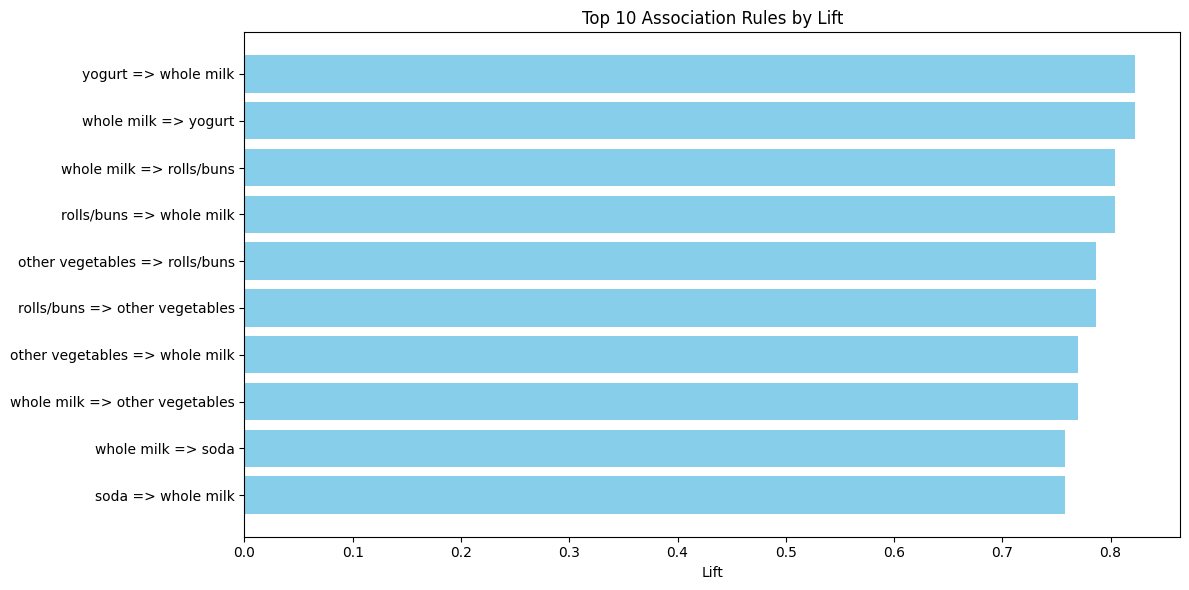

In [59]:
top_lift = rules_df.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_lift)), top_lift['lift'], color='skyblue')
plt.yticks(range(len(top_lift)), [f"{a} => {b}" for a, b in zip(top_lift['base'], top_lift['add'])])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


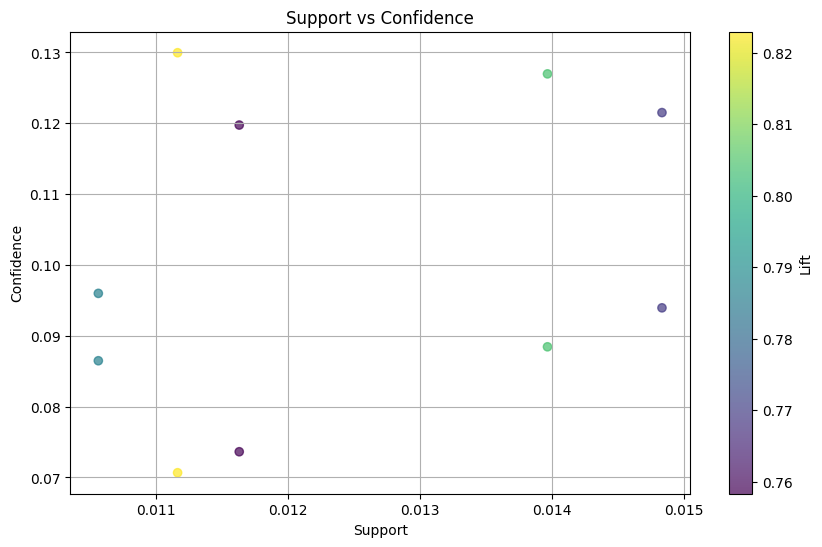

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(rules_df['support'], rules_df['confidence'], alpha=0.7, c=rules_df['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.title('Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

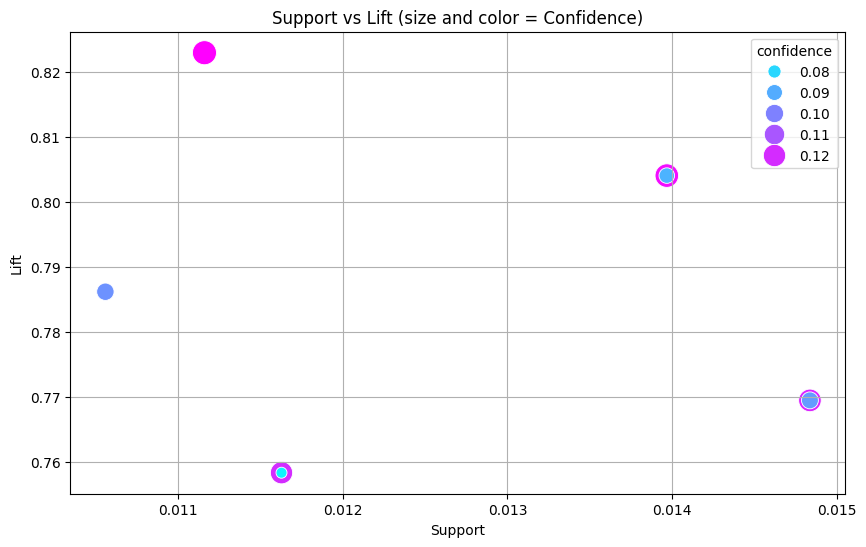

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_df, x='support', y='lift', size='confidence', hue='confidence', palette='cool', legend='brief', sizes=(50, 300))
plt.title('Support vs Lift (size and color = Confidence)')
plt.xlabel('Support')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

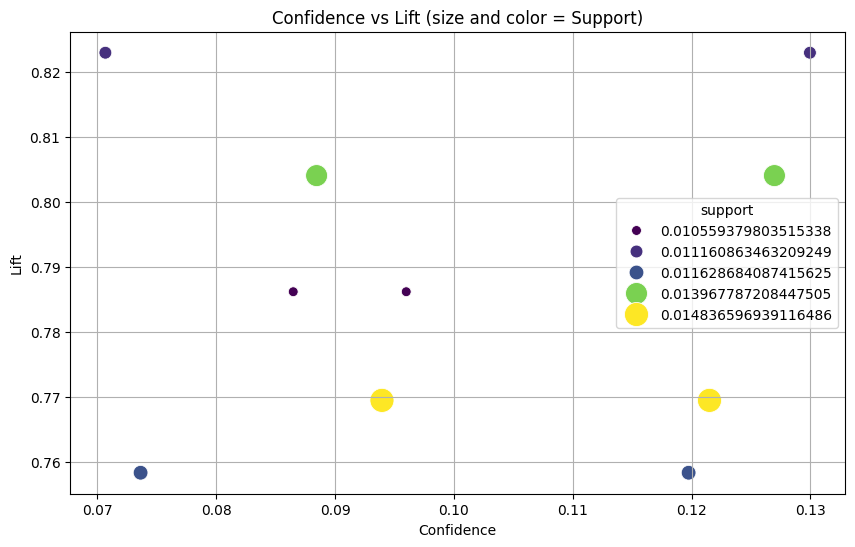

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules_df, x='confidence', y='lift', size='support', hue='support', palette='viridis', sizes=(50, 300))
plt.title('Confidence vs Lift (size and color = Support)')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid(True)
plt.show()

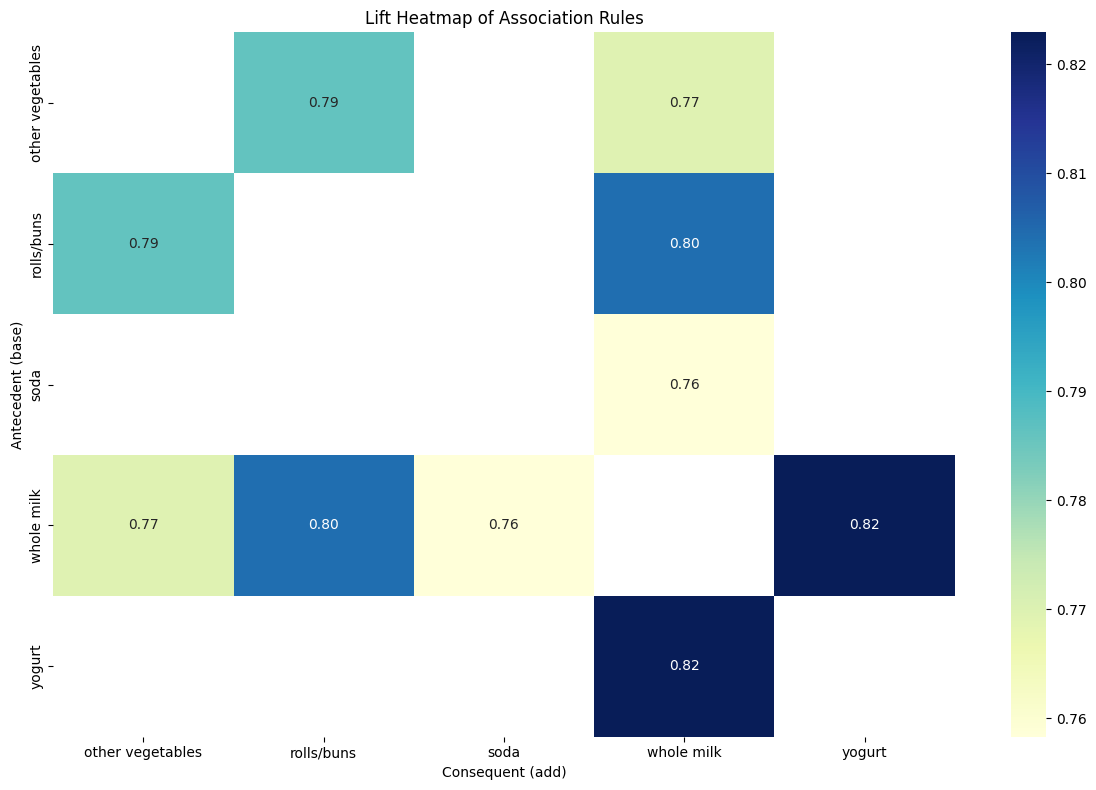

In [63]:
import seaborn as sns

pivot = rules_df.pivot(index='base', columns='add', values='lift')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Lift Heatmap of Association Rules')
plt.xlabel('Consequent (add)')
plt.ylabel('Antecedent (base)')
plt.tight_layout()
plt.show()

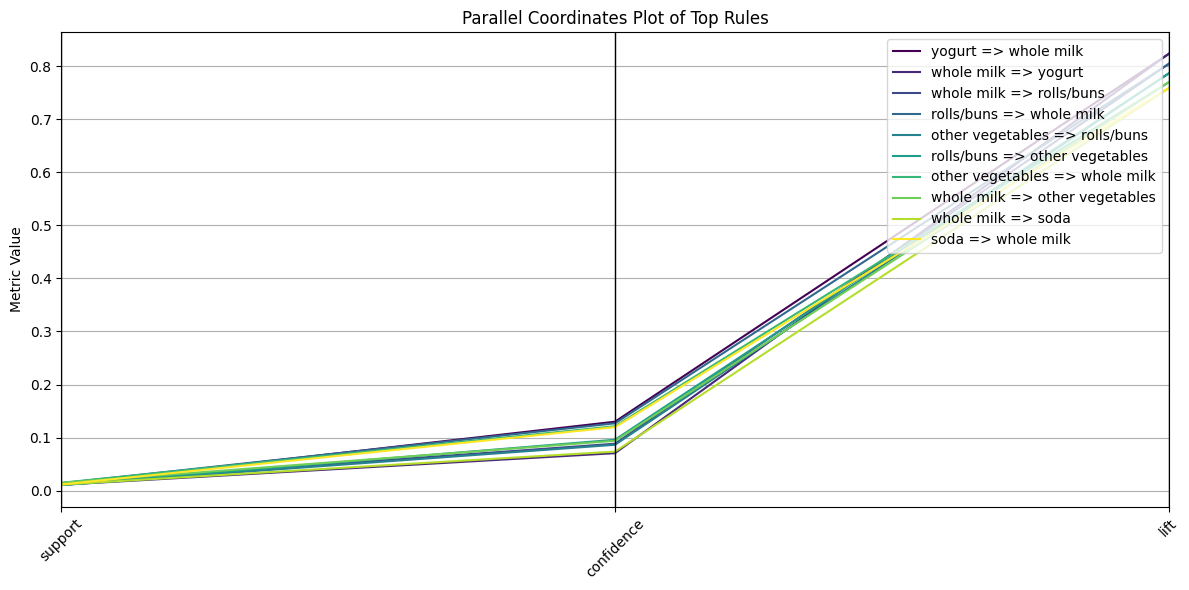

In [60]:
from pandas.plotting import parallel_coordinates

rules_df_top = rules_df[['support', 'confidence', 'lift']].copy()
rules_df_top['rule'] = [f"{a} => {b}" for a, b in zip(rules_df['base'], rules_df['add'])]
rules_df_top = rules_df_top.sort_values(by='lift', ascending=False).head(10)

plt.figure(figsize=(12, 6))
parallel_coordinates(rules_df_top, 'rule', colormap='viridis')
plt.title('Parallel Coordinates Plot of Top Rules')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

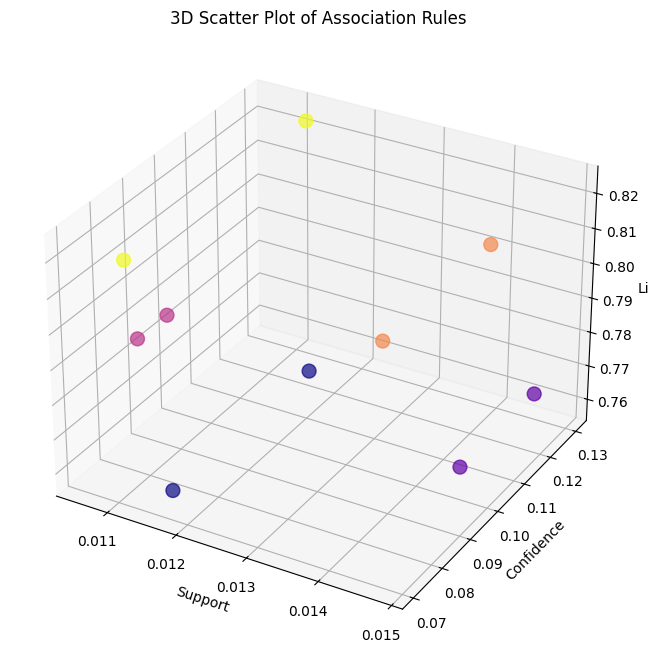

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rules_df['support'], rules_df['confidence'], rules_df['lift'],
           c=rules_df['lift'], cmap='plasma', s=100, alpha=0.7)

ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Lift')
ax.set_title('3D Scatter Plot of Association Rules')
plt.show()
